In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("employee.csv")
df

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,Sales,Analyst,Onsite,Yes,Yes,Low,Medium,Low,Weak,Yes,Poor,No
1,HR,Analyst,Onsite,No,No,Medium,Medium,High,Weak,No,Excellent,Yes
2,HR,Manager,Remote,No,No,High,High,Low,Strong,Yes,Poor,No
3,Marketing,Analyst,Onsite,Yes,Yes,Medium,Low,High,Average,Yes,Average,Yes
4,IT,Assistant,Hybrid,No,Yes,Medium,High,Low,Weak,Yes,Average,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,HR,Developer,Onsite,Yes,Yes,Medium,High,Low,Average,No,Poor,No
996,Finance,Assistant,Onsite,No,Yes,Low,Low,Low,Strong,Yes,Average,Yes
997,Sales,Developer,Onsite,Yes,No,Medium,Low,Low,Strong,Yes,Poor,No
998,Finance,Executive,Onsite,Yes,Yes,High,Low,Medium,Strong,Yes,Good,No


In [3]:
label=LabelEncoder()
df["Department"]=label.fit_transform(df["Department"])
df["Job_Role"]=label.fit_transform(df["Job_Role"])
df["Work_Location"]=label.fit_transform(df["Work_Location"])
df["Has_Certification"]=label.fit_transform(df["Has_Certification"])
df["Completed_Training"]=label.fit_transform(df["Completed_Training"])
df["Team_Spirit"]=label.fit_transform(df["Team_Spirit"])
df["Work_Quality"]=label.fit_transform(df["Work_Quality"])
df["Attendance"]=label.fit_transform(df["Attendance"])
df["Communication_Skill"]=label.fit_transform(df["Communication_Skill"])
df["Punctual"]=label.fit_transform(df["Punctual"])
df["Performance_Rating"]=label.fit_transform(df["Performance_Rating"])
df["Promoted"]=label.fit_transform(df["Promoted"])
df


,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,4,0,1,1,1,1,2,1,2,1,3,0
1,1,0,1,0,0,2,2,0,2,0,1,1
2,1,4,2,0,0,0,0,1,1,1,3,0
3,3,0,1,1,1,2,1,0,0,1,0,1
4,2,1,0,0,1,2,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,1,1,1,2,0,1,0,0,3,0
996,0,1,1,0,1,1,1,1,1,1,0,1
997,4,2,1,1,0,2,1,1,1,1,3,0
998,0,3,1,1,1,0,1,2,1,1,2,0


In [4]:
x=df.drop("Promoted",axis=1)
y=df["Promoted"]
y

0      0
1      1
2      0
3      1
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Promoted, Length: 1000, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating
147,3,0,1,1,0,0,2,0,2,0,1
88,1,1,2,0,1,0,1,1,2,0,3
731,1,2,2,1,0,2,1,2,2,1,1
741,4,3,1,0,1,2,0,2,2,1,0
36,4,3,0,1,1,2,2,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,0,1,1,1,2,2,2,1,3
817,2,3,1,0,1,1,1,2,2,1,2
255,0,4,0,1,0,0,2,2,0,1,2
320,0,1,1,0,1,0,1,0,1,1,0


In [6]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0])

In [8]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:50.00%


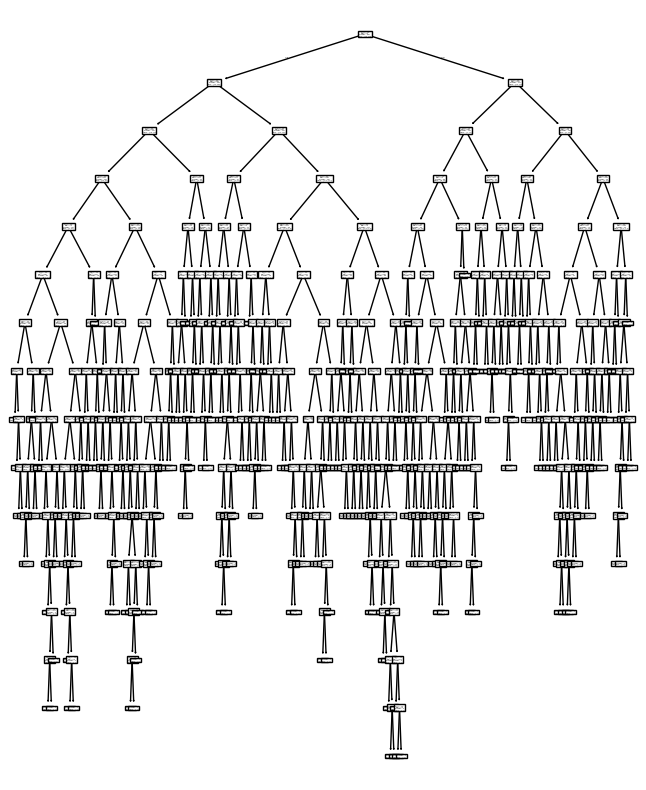

In [ ]:
plt.figure(figsize=(8,10))
plot_tree(model,feature_names=["Department","Job_Role","Work_Location","Has_Certification","Completed_Training","Team_Spirit","Work_Quality","Attendance","Communication_Skill","Punctual","Performance_Rating"],class_names=["play","no play"],filled=True)
plt.show()

In [10]:
data=pd.DataFrame({
    "Department":["HR"],
    "Job_Role":["Developer"],
    "Work_Location":["Onsite"],
    "Has_Certification":["Yes"],
    "Completed_Training":["Yes"],
    "Team_Spirit":["No"],
    "Work_Quality":["Low"],
    "Attendance":["Low"],
    "Communication_Skill":["Average"],
    "Punctual":["No"],
    "Performance_Rating":["Poor"],

})
data["Department"]=label.fit_transform(data["Department"])
data["Job_Role"]=label.fit_transform(data["Job_Role"])
data["Work_Location"]=label.fit_transform(data["Work_Location"])
data["Has_Certification"]=label.fit_transform(data["Has_Certification"])
data["Completed_Training"]=label.fit_transform(data["Completed_Training"])
data["Team_Spirit"]=label.fit_transform(data["Team_Spirit"])
data["Work_Quality"]=label.fit_transform(data["Work_Quality"])
data["Attendance"]=label.fit_transform(data["Attendance"])
data["Communication_Skill"]=label.fit_transform(data["Communication_Skill"])
data["Punctual"]=label.fit_transform(data["Punctual"])
data["Performance_Rating"]=label.fit_transform(data["Performance_Rating"])

predict=model.predict(data)
predict

array([0])